In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False


In [2]:
path = 'weather data/weather_combine.xlsx'

In [3]:
df = pd.read_excel(path)

df.head()

,Day,Max_Temperature,Avg_Temperature,Min_Temperature,Max_Dew Point,Avg_Dew Point,Min_Dew Point,Max_Humidity,Avg_Humidity,Min_Humidity,Max_Wind Speed,Avg_Wind Speed,Min_Wind Speed,Max_Pressure,Avg_Pressure,Min_Pressure,Precipitation,Month,Year
0,1,73,70.5,66,70,67.7,66,100,91.6,88,6,1.9,0,29.6,29.6,29.5,0.0,Jan,2018
1,2,68,65.5,64,68,65.5,64,100,100.0,100,7,1.3,0,29.6,29.5,29.5,0.0,Jan,2018
2,3,68,67.3,64,68,66.5,64,100,97.8,88,3,1.0,0,29.6,29.5,29.5,0.0,Jan,2018
3,4,77,68.0,59,68,63.2,55,100,85.5,65,8,3.3,0,29.6,29.6,29.5,0.0,Jan,2018
4,5,77,66.7,55,66,62.7,54,100,87.9,69,6,2.7,0,29.6,29.5,29.4,0.0,Jan,2018


In [4]:
temperature = ['Max_Temperature', 'Avg_Temperature', 'Min_Temperature','Max_Dew Point', 'Avg_Dew Point', 'Min_Dew Point']

for temp_feature in temperature:
    df[temp_feature] = (df[temp_feature]-32) * 0.5556
        
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Day,1821.0,15.733663,8.812573,1.00000,8.00000,16.00000,23.00000,31.00000
Max_Temperature,1821.0,34.164061,3.712283,20.00160,32.22480,33.89160,37.22520,42.78120
Avg_Temperature,1821.0,28.578069,4.396512,-12.72324,25.50204,29.50236,31.83588,40.50324
Min_Temperature,1821.0,21.423094,6.539531,-17.77920,17.22360,23.89080,26.11320,38.89200
Max_Dew Point,1821.0,22.242001,4.311988,6.11160,17.77920,23.89080,26.11320,28.89120
Avg_Dew Point,1821.0,20.105672,4.928931,-13.27884,15.72348,22.33512,24.22416,27.33552
Min_Dew Point,1821.0,17.608950,6.390435,-17.77920,12.22320,20.00160,22.77960,26.11320
Max_Humidity,1821.0,86.468424,9.709105,23.00000,83.00000,88.00000,94.00000,100.00000
Avg_Humidity,1821.0,63.583855,13.128754,8.20000,55.40000,64.50000,72.30000,100.00000
Min_Humidity,1821.0,44.757276,15.516576,0.00000,33.00000,45.00000,53.00000,100.00000


In [5]:
#
feature_columns = list(df.columns)
feature_columns.remove('Day')
feature_columns.remove('Month')
feature_columns.remove('Year')
feature_columns

['Max_Temperature',
 'Avg_Temperature',
 'Min_Temperature',
 'Max_Dew Point',
 'Avg_Dew Point',
 'Min_Dew Point',
 'Max_Humidity',
 'Avg_Humidity',
 'Min_Humidity',
 'Max_Wind Speed',
 'Avg_Wind Speed',
 'Min_Wind Speed',
 'Max_Pressure',
 'Avg_Pressure',
 'Min_Pressure',
 'Precipitation']

In [6]:
for temp_feature in feature_columns:
    median_val = df[temp_feature].median()
    sorty = sorted(df[temp_feature])
    q1, q3= np.percentile(sorty,[25,75])
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr) 
    
    for i in range(len(df[temp_feature])):
        if (df[temp_feature][i] < lower_bound) or (df[temp_feature][i] > upper_bound):
            df[temp_feature][i] = median_val


In [7]:
df.head()

,Day,Max_Temperature,Avg_Temperature,Min_Temperature,Max_Dew Point,Avg_Dew Point,Min_Dew Point,Max_Humidity,Avg_Humidity,Min_Humidity,Max_Wind Speed,Avg_Wind Speed,Min_Wind Speed,Max_Pressure,Avg_Pressure,Min_Pressure,Precipitation,Month,Year
0,1,33.8916,21.39060,18.8904,21.1128,19.83492,18.8904,100,91.6,45,6,1.9,0,29.6,29.6,29.5,0.0,Jan,2018
1,2,33.8916,18.61260,17.7792,20.0016,18.61260,17.7792,100,64.5,45,7,1.3,0,29.6,29.5,29.5,0.0,Jan,2018
2,3,33.8916,19.61268,17.7792,20.0016,19.16820,17.7792,100,64.5,45,3,1.0,0,29.6,29.5,29.5,0.0,Jan,2018
3,4,25.0020,20.00160,15.0012,20.0016,17.33472,12.7788,100,85.5,65,8,3.3,0,29.6,29.6,29.5,0.0,Jan,2018
4,5,25.0020,19.27932,12.7788,18.8904,17.05692,12.2232,100,87.9,69,6,2.7,0,29.6,29.5,29.4,0.0,Jan,2018


In [8]:
features=[
    'Max_Temperature',
    'Avg_Temperature', 
    'Min_Temperature', 
    'Max_Dew Point', 
    'Avg_Dew Point', 
    'Min_Dew Point', 
    'Max_Humidity', 
    'Avg_Humidity', 
    'Min_Humidity',
    #'Max_Pressure',
    #'Avg_Pressure',
    #'Min_Pressure'
]
target = ['Precipitation']
df1= df[features].copy()
df1.head()

,Max_Temperature,Avg_Temperature,Min_Temperature,Max_Dew Point,Avg_Dew Point,Min_Dew Point,Max_Humidity,Avg_Humidity,Min_Humidity
0,33.8916,21.39060,18.8904,21.1128,19.83492,18.8904,100,91.6,45
1,33.8916,18.61260,17.7792,20.0016,18.61260,17.7792,100,64.5,45
2,33.8916,19.61268,17.7792,20.0016,19.16820,17.7792,100,64.5,45
3,25.0020,20.00160,15.0012,20.0016,17.33472,12.7788,100,85.5,65
4,25.0020,19.27932,12.7788,18.8904,17.05692,12.2232,100,87.9,69


In [9]:
print(df['Precipitation'].unique())
rain_label = ['No rain', 'Light rain', 'Moderate rain', 'Heavy rain']

[0.  0.1 0.2 0.3]


In [10]:

def make_lags(ts, lags, lead_time=1):
    return pd.concat(
        {
            f'': ts.shift(i)
            for i in range(lead_time, lags + lead_time)
        },
        axis=1)

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
target = df['Precipitation'].copy()
target = np.array(target).reshape(-1, 1)
target = OH_encoder.fit_transform(target)
target = pd.DataFrame(target)
target = make_lags(target, lags=1).fillna(0.0)
target = target.set_axis(rain_label, axis=1, inplace = False)
target

,No rain,Light rain,Moderate rain,Heavy rain
0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
1816,1.0,0.0,0.0,0.0
1817,1.0,0.0,0.0,0.0
1818,1.0,0.0,0.0,0.0
1819,1.0,0.0,0.0,0.0


In [11]:
df2 = pd.concat([df1, target], axis =1)[1:].reset_index(drop=True)
df2.head()

,Max_Temperature,Avg_Temperature,Min_Temperature,Max_Dew Point,Avg_Dew Point,Min_Dew Point,Max_Humidity,Avg_Humidity,Min_Humidity,No rain,Light rain,Moderate rain,Heavy rain
0,33.8916,18.61260,17.7792,20.0016,18.61260,17.7792,100,64.5,45,1.0,0.0,0.0,0.0
1,33.8916,19.61268,17.7792,20.0016,19.16820,17.7792,100,64.5,45,1.0,0.0,0.0,0.0
2,25.0020,20.00160,15.0012,20.0016,17.33472,12.7788,100,85.5,65,1.0,0.0,0.0,0.0
3,25.0020,19.27932,12.7788,18.8904,17.05692,12.2232,100,87.9,69,1.0,0.0,0.0,0.0
4,27.2244,20.89056,12.7788,18.8904,16.11240,12.2232,94,75.9,54,1.0,0.0,0.0,0.0


In [12]:
X = df2[features].copy()
y = df2[rain_label].copy()

In [13]:
X = tf.convert_to_tensor(X)
y = tf.convert_to_tensor(y)
    
input_size = X.shape[1]
output_size = y.shape
print('input_size ', input_size)
print('output_size ', output_size)

input_size  9
output_size  (1820, 4)


In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Normalization(input_shape=([input_size,])),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.00005),
              loss="categorical_crossentropy",
              metrics=['accuracy'])

epochs=500
    
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=20,
                                            restore_best_weights = True
                                            
                                        )

history = model.fit(
    X,
    y,
    epochs=epochs,
    #callbacks=[callback],
    validation_split = 0.3
)

Epoch 1/500
40/40 [==============================] - 2s 11ms/step - loss: 1.2070 - accuracy: 0.5730 - val_loss: 0.9187 - val_accuracy: 0.6337
Epoch 2/500
40/40 [==============================] - 0s 7ms/step - loss: 0.7093 - accuracy: 0.7096 - val_loss: 1.0127 - val_accuracy: 0.5916
Epoch 3/500
40/40 [==============================] - 0s 6ms/step - loss: 0.6661 - accuracy: 0.7072 - val_loss: 0.9639 - val_accuracy: 0.6465
Epoch 4/500
40/40 [==============================] - 0s 5ms/step - loss: 0.6439 - accuracy: 0.7174 - val_loss: 0.8501 - val_accuracy: 0.6447
Epoch 5/500
40/40 [==============================] - 0s 6ms/step - loss: 0.6082 - accuracy: 0.7410 - val_loss: 0.8947 - val_accuracy: 0.6465
Epoch 6/500
40/40 [==============================] - 0s 6ms/step - loss: 0.6088 - accuracy: 0.7394 - val_loss: 0.9000 - val_accuracy: 0.6520
Epoch 7/500
40/40 [==============================] - 0s 5ms/step - loss: 0.5837 - accuracy: 0.7410 - val_loss: 0.9076 - val_accuracy: 0.6465
Epoch 8/500


Epoch 59/500
40/40 [==============================] - 0s 6ms/step - loss: 0.4920 - accuracy: 0.7936 - val_loss: 0.8716 - val_accuracy: 0.6227
Epoch 60/500
40/40 [==============================] - 0s 5ms/step - loss: 0.4937 - accuracy: 0.7826 - val_loss: 0.9183 - val_accuracy: 0.6429
Epoch 61/500
40/40 [==============================] - 0s 6ms/step - loss: 0.4901 - accuracy: 0.7857 - val_loss: 0.9177 - val_accuracy: 0.6337
Epoch 62/500
40/40 [==============================] - 0s 6ms/step - loss: 0.4879 - accuracy: 0.7873 - val_loss: 0.9086 - val_accuracy: 0.6264
Epoch 63/500
40/40 [==============================] - 0s 6ms/step - loss: 0.4876 - accuracy: 0.7841 - val_loss: 0.9115 - val_accuracy: 0.6538
Epoch 64/500
40/40 [==============================] - 0s 7ms/step - loss: 0.4925 - accuracy: 0.7755 - val_loss: 0.9097 - val_accuracy: 0.6484
Epoch 65/500
40/40 [==============================] - 0s 6ms/step - loss: 0.4844 - accuracy: 0.7904 - val_loss: 0.9448 - val_accuracy: 0.6282
Epoch 

40/40 [==============================] - 0s 7ms/step - loss: 0.4532 - accuracy: 0.7943 - val_loss: 0.8764 - val_accuracy: 0.6355
Epoch 117/500
40/40 [==============================] - 0s 6ms/step - loss: 0.4594 - accuracy: 0.7920 - val_loss: 0.9211 - val_accuracy: 0.6392
Epoch 118/500
40/40 [==============================] - 0s 6ms/step - loss: 0.4757 - accuracy: 0.7904 - val_loss: 0.9131 - val_accuracy: 0.6392
Epoch 119/500
40/40 [==============================] - 0s 6ms/step - loss: 0.4633 - accuracy: 0.7912 - val_loss: 0.9338 - val_accuracy: 0.6410
Epoch 120/500
40/40 [==============================] - 0s 7ms/step - loss: 0.4590 - accuracy: 0.7904 - val_loss: 0.9547 - val_accuracy: 0.6484
Epoch 121/500
40/40 [==============================] - 0s 6ms/step - loss: 0.4644 - accuracy: 0.7912 - val_loss: 0.8883 - val_accuracy: 0.6374
Epoch 122/500
40/40 [==============================] - 0s 6ms/step - loss: 0.4579 - accuracy: 0.7943 - val_loss: 0.8576 - val_accuracy: 0.6484
Epoch 123/500

40/40 [==============================] - 0s 6ms/step - loss: 0.4379 - accuracy: 0.8077 - val_loss: 0.9151 - val_accuracy: 0.6374
Epoch 174/500
40/40 [==============================] - 0s 5ms/step - loss: 0.4439 - accuracy: 0.8014 - val_loss: 1.1546 - val_accuracy: 0.6282
Epoch 175/500
40/40 [==============================] - 0s 6ms/step - loss: 0.4443 - accuracy: 0.8006 - val_loss: 0.9198 - val_accuracy: 0.6374
Epoch 176/500
40/40 [==============================] - 0s 6ms/step - loss: 0.4421 - accuracy: 0.8069 - val_loss: 0.8654 - val_accuracy: 0.6355
Epoch 177/500
40/40 [==============================] - 0s 6ms/step - loss: 0.4513 - accuracy: 0.7928 - val_loss: 0.8550 - val_accuracy: 0.6593
Epoch 178/500
40/40 [==============================] - 0s 5ms/step - loss: 0.4477 - accuracy: 0.7998 - val_loss: 0.9548 - val_accuracy: 0.6429
Epoch 179/500
40/40 [==============================] - 0s 5ms/step - loss: 0.4406 - accuracy: 0.8124 - val_loss: 0.9120 - val_accuracy: 0.6355
Epoch 180/500

40/40 [==============================] - 0s 6ms/step - loss: 0.4186 - accuracy: 0.8140 - val_loss: 0.9150 - val_accuracy: 0.6465
Epoch 231/500
40/40 [==============================] - 0s 7ms/step - loss: 0.4368 - accuracy: 0.8116 - val_loss: 1.1274 - val_accuracy: 0.6190
Epoch 232/500
40/40 [==============================] - 0s 7ms/step - loss: 0.4305 - accuracy: 0.8140 - val_loss: 0.9688 - val_accuracy: 0.6355
Epoch 233/500
40/40 [==============================] - 0s 6ms/step - loss: 0.4253 - accuracy: 0.8100 - val_loss: 0.9018 - val_accuracy: 0.6484
Epoch 234/500
40/40 [==============================] - 0s 6ms/step - loss: 0.4419 - accuracy: 0.7975 - val_loss: 0.9961 - val_accuracy: 0.6374
Epoch 235/500
40/40 [==============================] - 0s 6ms/step - loss: 0.4186 - accuracy: 0.8100 - val_loss: 0.9829 - val_accuracy: 0.6374
Epoch 236/500
40/40 [==============================] - 0s 7ms/step - loss: 0.4212 - accuracy: 0.8124 - val_loss: 1.0338 - val_accuracy: 0.6484
Epoch 237/500

40/40 [==============================] - 0s 6ms/step - loss: 0.3978 - accuracy: 0.8257 - val_loss: 0.9942 - val_accuracy: 0.6355
Epoch 288/500
40/40 [==============================] - 0s 6ms/step - loss: 0.3992 - accuracy: 0.8226 - val_loss: 1.0400 - val_accuracy: 0.6300
Epoch 289/500
40/40 [==============================] - 0s 6ms/step - loss: 0.3993 - accuracy: 0.8281 - val_loss: 1.0411 - val_accuracy: 0.6374
Epoch 290/500
40/40 [==============================] - 0s 7ms/step - loss: 0.4011 - accuracy: 0.8226 - val_loss: 0.9703 - val_accuracy: 0.6410
Epoch 291/500
40/40 [==============================] - 0s 6ms/step - loss: 0.3957 - accuracy: 0.8257 - val_loss: 1.0777 - val_accuracy: 0.6264
Epoch 292/500
40/40 [==============================] - 0s 6ms/step - loss: 0.4120 - accuracy: 0.8163 - val_loss: 1.0851 - val_accuracy: 0.6392
Epoch 293/500
40/40 [==============================] - 0s 8ms/step - loss: 0.4106 - accuracy: 0.8195 - val_loss: 1.1741 - val_accuracy: 0.6245
Epoch 294/500

40/40 [==============================] - 0s 7ms/step - loss: 0.3851 - accuracy: 0.8265 - val_loss: 0.9899 - val_accuracy: 0.6282
Epoch 345/500
40/40 [==============================] - 0s 8ms/step - loss: 0.3778 - accuracy: 0.8367 - val_loss: 1.0064 - val_accuracy: 0.6319
Epoch 346/500
40/40 [==============================] - 0s 6ms/step - loss: 0.3893 - accuracy: 0.8226 - val_loss: 1.0505 - val_accuracy: 0.6374
Epoch 347/500
40/40 [==============================] - 0s 8ms/step - loss: 0.3827 - accuracy: 0.8281 - val_loss: 0.9271 - val_accuracy: 0.6484
Epoch 348/500
40/40 [==============================] - 0s 8ms/step - loss: 0.3827 - accuracy: 0.8399 - val_loss: 1.0116 - val_accuracy: 0.6429
Epoch 349/500
40/40 [==============================] - 0s 8ms/step - loss: 0.3933 - accuracy: 0.8297 - val_loss: 1.0416 - val_accuracy: 0.6355
Epoch 350/500
40/40 [==============================] - 0s 8ms/step - loss: 0.3875 - accuracy: 0.8312 - val_loss: 1.0940 - val_accuracy: 0.6264
Epoch 351/500

40/40 [==============================] - 0s 6ms/step - loss: 0.3679 - accuracy: 0.8375 - val_loss: 1.0702 - val_accuracy: 0.6319
Epoch 402/500
40/40 [==============================] - 0s 6ms/step - loss: 0.3851 - accuracy: 0.8226 - val_loss: 1.1502 - val_accuracy: 0.6337
Epoch 403/500
40/40 [==============================] - 0s 6ms/step - loss: 0.3632 - accuracy: 0.8407 - val_loss: 0.9796 - val_accuracy: 0.6355
Epoch 404/500
40/40 [==============================] - 0s 7ms/step - loss: 0.3911 - accuracy: 0.8203 - val_loss: 1.2032 - val_accuracy: 0.6300
Epoch 405/500
40/40 [==============================] - 0s 6ms/step - loss: 0.3831 - accuracy: 0.8305 - val_loss: 1.0273 - val_accuracy: 0.6447
Epoch 406/500
40/40 [==============================] - 0s 6ms/step - loss: 0.3697 - accuracy: 0.8312 - val_loss: 1.0033 - val_accuracy: 0.6355
Epoch 407/500
40/40 [==============================] - 0s 6ms/step - loss: 0.3598 - accuracy: 0.8352 - val_loss: 1.0760 - val_accuracy: 0.6410
Epoch 408/500

40/40 [==============================] - 0s 5ms/step - loss: 0.3517 - accuracy: 0.8556 - val_loss: 1.0802 - val_accuracy: 0.6502
Epoch 459/500
40/40 [==============================] - 0s 5ms/step - loss: 0.3742 - accuracy: 0.8281 - val_loss: 1.0830 - val_accuracy: 0.6410
Epoch 460/500
40/40 [==============================] - 0s 6ms/step - loss: 0.3470 - accuracy: 0.8462 - val_loss: 1.0176 - val_accuracy: 0.6484
Epoch 461/500
40/40 [==============================] - 0s 6ms/step - loss: 0.3560 - accuracy: 0.8462 - val_loss: 1.0798 - val_accuracy: 0.6392
Epoch 462/500
40/40 [==============================] - 0s 5ms/step - loss: 0.3434 - accuracy: 0.8430 - val_loss: 1.0703 - val_accuracy: 0.6392
Epoch 463/500
40/40 [==============================] - 0s 5ms/step - loss: 0.3429 - accuracy: 0.8477 - val_loss: 1.0887 - val_accuracy: 0.6484
Epoch 464/500
40/40 [==============================] - 0s 6ms/step - loss: 0.3589 - accuracy: 0.8438 - val_loss: 1.2521 - val_accuracy: 0.6209
Epoch 465/500

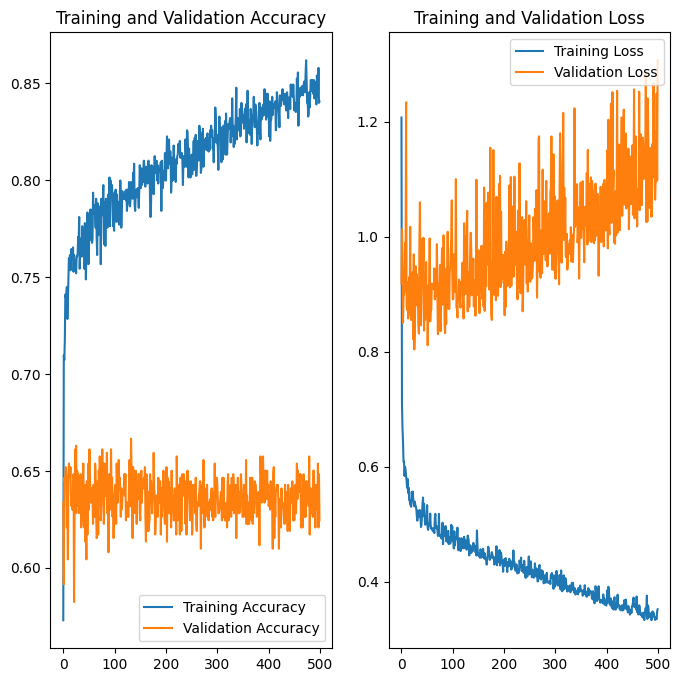

In [15]:
def history_graph(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()
history_graph(history)

In [16]:
evalu = model.evaluate(X,y)
nam = model.metrics_names

57/57 [==============================] - 0s 3ms/step - loss: 0.6453 - accuracy: 0.7742


In [17]:
print(nam[0],'value =', evalu[0], '\n', nam[1], 'value = ', evalu[1])

loss value = 0.6452740430831909 
 accuracy value =  0.7741758227348328


In [18]:
a = model.predict(X[110])
a = list(a[0])
print(a)

n = a.index(max(a))
print(rain_label[n])
n

1/1 [==============================] - 0s 92ms/step
[0.05666305, 0.700158, 0.2431712, 7.744401e-06]
Light rain


1

In [19]:
y[110]

<tf.Tensor: shape=(4,), dtype=float64, numpy=array([0., 1., 0., 0.])>

In [20]:
model.save('saved_model/rain_model')

INFO:tensorflow:Assets written to: saved_model/rain_model\assets
